## Comparing local oscillators, original vs. HM's implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# spectrome imports
from spectrome.brain import Brain
from spectrome.utils import functions, path
from spectrome.forward import eigenmode, runforward

In [2]:
# House keeping cell:

# directory for HCP template connectomes
hcp_dir = './../../data'

# define frequency range of interest
fmin = 2
fmax = 45
fvec = np.linspace(fmin, fmax, 40)

# Initialize Brain object
HCP_brain = Brain.Brain()
HCP_brain.add_connectome(hcp_dir)
HCP_brain.reorder_connectome(HCP_brain.connectome, HCP_brain.distance_matrix)
HCP_brain.bi_symmetric_c()
HCP_brain.reduce_extreme_dir()

In [3]:
default_params = HCP_brain.ntf_params # default parameters for the spectral graph model
print(default_params)

{'tau_e': 0.012, 'tau_i': 0.003, 'alpha': 1.0, 'speed': 5.0, 'gei': 4.0, 'gii': 1.0, 'tauC': 0.006}


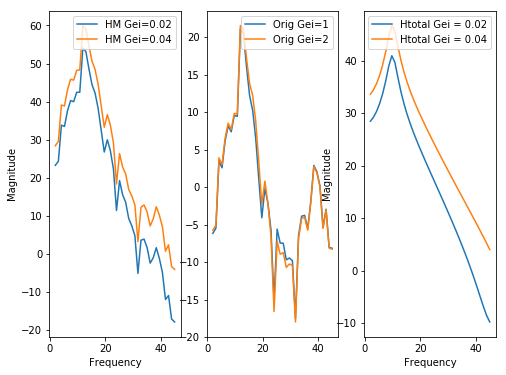

In [9]:
%matplotlib inline
# Plot out the frequency responses:
plt.figure('Frequency Responses', figsize = [8,6])

# changing gei: 
default_params["gei"] = 1
freq_model, frequency_response, evec, Vvec = runforward.run_forward(
HCP_brain, default_params, fvec
)

# change gei again for alternative model
default_params["gei"] = 0.02
freq_HM, fr_HM, _, _, Htotal_out = runforward.run_HM_forward(
HCP_brain, default_params, fvec
)
HM_region = freq_HM[0,:]
plt.subplot(1,3,1)
plt.plot(fvec,np.transpose(functions.mag2db(np.abs(HM_region))), label = 'HM Gei=0.02')
plot_region = freq_model[0,:]
plt.subplot(1,3,2)
plt.plot(fvec,np.transpose(functions.mag2db(np.abs(plot_region))),label = 'Orig Gei=1');
plt.subplot(1,3,3)
plt.plot(fvec,functions.mag2db(np.abs(Htotal_out)), label = 'Htotal Gei = 0.02')

default_params["gei"] = 2
freq_model, frequency_response, evec, Vvec = runforward.run_forward(
HCP_brain, default_params, fvec
)
# change gei again for alternative model
default_params["gei"] = 0.04
freq_HM, fr_HM, _, _, Htotal_out = runforward.run_HM_forward(
HCP_brain, default_params, fvec
)
HM_region = freq_HM[0,:]
plot_region = freq_model[0,:]
plt.subplot(1,3,2)
plt.plot(fvec,np.transpose(functions.mag2db(np.abs(plot_region))), label = 'Orig Gei=2');
plt.gca().legend(loc = 'upper right')

plt.subplot(1,3,1)
plt.plot(fvec,np.transpose(functions.mag2db(np.abs(HM_region))), label = 'HM Gei=0.04')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.gca().legend(loc = 'upper right')

plt.subplot(1,3,3)
plt.plot(fvec,functions.mag2db(np.abs(Htotal_out)), label = 'Htotal Gei = 0.04')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.gca().legend(loc = 'upper right')

In [5]:
Htotal_out.shape

(40,)

In [6]:
frequency_response.shape

(40, 86)

#### Why is `Htotal_out` a 1xlen(fvec) vector? Figure out what it is with HM.